**Contents：**
- 1.**Import trained model**
- 2.**Related information about the model**
        2.1 Structure of the model
        2.2 Hyperparameters for model training (manually set)
        2.3 Model parameters (weights and biases)
            2.3.1 Input layer
            2.3.2 Hidden layers
- 3.**Import and process data**
        3.1 Division of test set
        3.2 Convert to tensor format
- 4.**GPU(cuda)**
- 5.**Training set fitting**
- 6.**Test set prediction and evaluation**
- 7.**Visualization**
        7.1 Fit visualization (partial)
        7.2 Prediction Visualization
- 7.**Explanation**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 

import os

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# 1. Import model

In [2]:
class Network(nn.Module):
    def __init__(self, num_features):
        super(Network, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 512)
        self.layer_out = nn.Linear(512, 1)
        
        self.activation = nn.Sigmoid()
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, inputs):
        x = self.activation(self.layer_1(inputs))
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return (x)

In [3]:
net = Network(3)

In [4]:
net = torch.load("model.pth")

# 2. Related information about the model

## 2.1 Structure of the model

Single layer neural network:：
 - Input Dimensions：3
 - Hidden layer dimension：512
 - Output dimension：1
 
The activation function is Sigmoid\
Dropout is set to 0.2

In [5]:
print(net)

Network(
  (layer_1): Linear(in_features=3, out_features=512, bias=True)
  (layer_out): Linear(in_features=512, out_features=1, bias=True)
  (activation): Sigmoid()
  (dropout): Dropout(p=0.2, inplace=False)
)


## 2.2 Hyperparameters for model training (manually set)

batch_size = 200\
learning rate = 0.001\
regularization = L2\
epoch = 15,000

## 2.3 Model parameters (weights and biases)

In [6]:
params = list(net.named_parameters())

### 2.3.1 Input layer

weight: (512 * 3)

In [7]:
params[0]

('layer_1.weight',
 Parameter containing:
 tensor([[  3.2812,   3.6158,  -7.4738],
         [  6.2109,  16.8947,   0.2450],
         [ -0.7683,   1.9254, -13.2258],
         ...,
         [  8.8476,  14.9932,   1.2393],
         [  5.7170,   4.2014, -10.5321],
         [ -0.1666,  25.5453,   0.7460]], device='cuda:0', requires_grad=True))

In [8]:
params[0][1].shape

torch.Size([512, 3])

bias: 512

In [9]:
params[1]

('layer_1.bias',
 Parameter containing:
 tensor([-8.5238e-01, -1.1612e+00,  2.0192e-01, -1.0755e+00, -9.0324e-01,
         -7.4732e-01,  6.3413e+00,  6.7270e+00, -7.5140e-01, -6.6407e-01,
         -3.9255e-01,  5.8607e+00,  6.3467e+00, -1.0632e+00,  3.0307e+00,
         -1.3316e+00, -7.8386e-01, -8.3101e-01, -1.1757e+00, -6.2704e-02,
          2.6251e+00, -2.9986e-01, -1.3131e-01, -1.1174e+00, -1.4369e+00,
          7.1442e+00, -7.5447e-01, -8.7673e-01, -2.3512e-01, -8.3467e-01,
         -1.2424e-01, -2.9433e-01, -3.0226e-02, -2.2660e-01, -1.3299e+00,
          2.0039e-01,  6.2425e+00, -8.9395e-01, -4.9007e-01, -1.2003e+00,
         -4.8435e-01, -5.4760e-01, -7.9866e-01,  6.8371e+00, -1.2667e-01,
         -2.2783e-02,  6.7733e+00, -1.3814e+00, -1.1686e+00, -4.9245e-02,
          3.8366e+00, -3.6230e-03, -7.7309e-01,  2.7529e-01, -2.9153e-01,
         -1.0046e+00, -2.9819e-01, -7.5552e-01, -2.8669e-01, -3.2195e-01,
         -8.2375e-01,  3.4515e+00,  6.9187e+00,  6.6769e+00, -1.4908e+00

### 2.3.2 Hidden layers

weight: 512

In [10]:
params[2]

('layer_out.weight',
 Parameter containing:
 tensor([[4.3013, 4.3673, 7.6063, 3.8516, 3.7632, 5.1984, 7.3327, 3.8279, 4.1648,
          5.6174, 3.8946, 3.4082, 3.8229, 6.9501, 2.5194, 4.2096, 5.2011, 4.2148,
          4.0915, 6.1412, 3.5545, 6.0023, 3.7631, 4.1548, 3.7097, 4.0092, 3.8816,
          4.9291, 3.9180, 5.2667, 6.2295, 5.9791, 6.4908, 6.5638, 4.3707, 7.6002,
          3.1937, 5.0025, 5.5653, 4.1730, 6.3201, 4.7244, 5.3442, 3.8367, 6.7730,
          6.8250, 3.8983, 4.5980, 3.8519, 5.9305, 2.4840, 7.2102, 5.5343, 8.3970,
          7.6575, 4.0533, 6.7861, 4.1208, 5.2884, 5.8521, 4.2159, 3.5385, 3.4891,
          3.6325, 4.1839, 6.9655, 8.5145, 3.9266, 5.9500, 4.6320, 4.0103, 7.6721,
          3.6641, 3.2166, 3.9835, 3.4580, 3.4115, 7.0429, 4.1494, 5.1853, 6.2172,
          6.8001, 3.3325, 3.6826, 7.3319, 7.1523, 3.1136, 4.3077, 7.2374, 6.4313,
          4.6712, 6.3148, 5.8602, 5.3957, 3.0068, 6.6993, 4.2090, 7.4684, 5.1618,
          5.1974, 7.4193, 3.6329, 4.7919, 3.8072, 2.88

bias: 1

In [11]:
params[3]

('layer_out.bias',
 Parameter containing:
 tensor([45.2472], device='cuda:0', requires_grad=True))

# 3. Import and process data

In [12]:
train = pd.read_csv('train_show.csv')
test = pd.read_csv('test_phy.csv')

## 3.1 Division of test set

In [13]:
def DivideTest(test, temp):
    sub_test = test[test['temperature']==temp]
    sub_test.reset_index(inplace=True, drop = True)
    return sub_test

In [14]:
test_df_288 = DivideTest(test, 288)
test_df_473 = DivideTest(test, 473)
test_df_673 = DivideTest(test, 673)
test_df_873 = DivideTest(test, 873)

In [15]:
# Divide the data into features (X) and targets (Y)
def SplitData(data, target_name):
    
    y = np.array(data[target_name])
    x = data.drop(target_name, axis = 1)
    x = np.array(x)
    return x, y

In [16]:
x_train, y_train = SplitData(train, 'stress')
x_test_288, y_test_288 = SplitData(test_df_288, 'stress')
x_test_473, y_test_473 = SplitData(test_df_473, 'stress')
x_test_673, y_test_673 = SplitData(test_df_673, 'stress')
x_test_873, y_test_873 = SplitData(test_df_873, 'stress')

In [17]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test_288 = scaler.transform(x_test_288)
x_test_473 = scaler.transform(x_test_473)
x_test_673 = scaler.transform(x_test_673)
x_test_873 = scaler.transform(x_test_873)

In [18]:
print(train.shape)
print(test.shape)

(677, 4)
(133, 4)


## 3.2 Convert to tensor format

In [19]:
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

train_dataset = RegressionDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).float())

In [20]:
test_288 = RegressionDataset(torch.from_numpy(x_test_288).float(), torch.from_numpy(y_test_288).float())
test_473 = RegressionDataset(torch.from_numpy(x_test_473).float(), torch.from_numpy(y_test_473).float())
test_673 = RegressionDataset(torch.from_numpy(x_test_673).float(), torch.from_numpy(y_test_673).float())
test_873 = RegressionDataset(torch.from_numpy(x_test_873).float(), torch.from_numpy(y_test_873).float())

In [21]:
train_loader = DataLoader(train_dataset, batch_size = 1, shuffle = False)
test_loader_288 = DataLoader(test_288, batch_size = 1)
test_loader_473 = DataLoader(test_473, batch_size = 1)
test_loader_673 = DataLoader(test_673, batch_size = 1)
test_loader_873 = DataLoader(test_873, batch_size = 1)

# 4. GPU(cuda)

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [23]:
net.to(device)

Network(
  (layer_1): Linear(in_features=3, out_features=512, bias=True)
  (layer_out): Linear(in_features=512, out_features=1, bias=True)
  (activation): Sigmoid()
  (dropout): Dropout(p=0.2, inplace=False)
)

# 5. Training set fitting

In [24]:
y_pred = []
with torch.no_grad():
    net.eval()
    for X_batch, _ in train_loader:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch)
        y_pred.append(y_test_pred.cpu().numpy())
y_pred = [a.squeeze().tolist() for a in y_pred]

In [25]:
y_pred_df = pd.DataFrame(y_pred)
result_fit = pd.concat([train, y_pred_df], axis = 1)
result_fit.columns = ['plastic_strain', 'strain_rate', 'temperature', 'stress', 'fit']

In [26]:
result_fit.head()

,plastic_strain,strain_rate,temperature,stress,fit
0,0.000991,0.001,173,1128.596313,1220.720703
1,0.013471,0.001,173,1180.670540,1260.862793
2,0.021910,0.001,173,1210.187402,1290.142700
3,0.031264,0.001,173,1241.381262,1323.968140
4,0.042438,0.001,173,1279.613957,1365.158813


保存拟合结果

In [27]:
#result_fit.to_csv('result_fit.csv', index = False)

# 6. Test set prediction and evaluation

Evaluation function settings:

In [28]:
def evaluation(y_hat, y):
    error = (sum(abs((y_hat - y)/y_hat)) / len(y_hat)) * 100
    return error

1. temp = 288

In [29]:
y_pred_288 = []
with torch.no_grad():
    net.eval()
    for X_batch, _ in test_loader_288:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch)
        y_pred_288.append(y_test_pred.cpu().numpy())
y_pred_288 = [a.squeeze().tolist() for a in y_pred_288]

In [30]:
error = evaluation(y_pred_288, y_test_288)
error

7.025310136508074

In [31]:
pred_df = pd.DataFrame(y_pred_288)
result_288 = pd.concat([test_df_288, pred_df], axis = 1)
result_288.columns = ['plastic_strain', 'strain_rate', 'temperature', 'stress', 'pred']

In [32]:
#result_288.to_csv('result_288.csv', index = False)

2. temp = 473

In [33]:
y_pred_473 = []
with torch.no_grad():
    net.eval()
    for X_batch, _ in test_loader_473:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch)
        y_pred_473.append(y_test_pred.cpu().numpy())
y_pred_473 = [a.squeeze().tolist() for a in y_pred_473]

In [34]:
error = evaluation(y_pred_473, y_test_473)
error

2.9471510893064505

In [35]:
pred_df = pd.DataFrame(y_pred_473)
result_473 = pd.concat([test_df_473, pred_df], axis = 1)
result_473.columns = ['plastic_strain', 'strain_rate', 'temperature', 'stress', 'pred']

In [36]:
#result_473.to_csv('result_473.csv', index = False)

3. temp = 673

In [37]:
y_pred_673 = []
with torch.no_grad():
    net.eval()
    for X_batch, _ in test_loader_673:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch)
        y_pred_673.append(y_test_pred.cpu().numpy())
y_pred_673 = [a.squeeze().tolist() for a in y_pred_673]

In [38]:
error = evaluation(y_pred_673, y_test_673)
error

5.437903521548053

In [39]:
pred_df = pd.DataFrame(y_pred_673)
result_673 = pd.concat([test_df_673, pred_df], axis = 1)
result_673.columns = ['plastic_strain', 'strain_rate', 'temperature', 'stress', 'pred']

In [40]:
#result_673.to_csv('result_673.csv', index = False)

4. temp = 873

In [41]:
y_pred_873 = []
with torch.no_grad():
    net.eval()
    for X_batch, _ in test_loader_873:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch)
        y_pred_873.append(y_test_pred.cpu().numpy())
y_pred_873 = [a.squeeze().tolist() for a in y_pred_873]

In [42]:
error = evaluation(y_pred_873, y_test_873)
error

5.996985492169927

In [43]:
pred_df = pd.DataFrame(y_pred_873)
result_873 = pd.concat([test_df_873, pred_df], axis = 1)
result_873.columns = ['plastic_strain', 'strain_rate', 'temperature', 'stress', 'pred']

In [44]:
#result_873.to_csv('result_873.csv', index = False)

# 7. Visualization

## 7.1 Fit visualization (partial)

In [45]:
show1 = result_fit.loc[(result_fit['strain_rate'] == 0.001) & (result_fit['temperature']==288)]
show2 = result_fit.loc[(result_fit['strain_rate'] == 0.001) & (result_fit['temperature']==673)]
show3 = result_fit.loc[(result_fit['strain_rate'] == 1) & (result_fit['temperature']==473)]
show4 = result_fit.loc[(result_fit['strain_rate'] == 1) & (result_fit['temperature']==873)]
show5 = result_fit.loc[(result_fit['strain_rate'] == 200) & (result_fit['temperature']==473)]
show6 = result_fit.loc[(result_fit['strain_rate'] == 200) & (result_fit['temperature']==873)]
show7 = result_fit.loc[(result_fit['strain_rate'] == 200) & (result_fit['temperature']==673)]
show8 = result_fit.loc[(result_fit['strain_rate'] == 3000) & (result_fit['temperature']==288)]
show9 = result_fit.loc[(result_fit['strain_rate'] == 3000) & (result_fit['temperature']==673)]

(650.0, 1400.0)

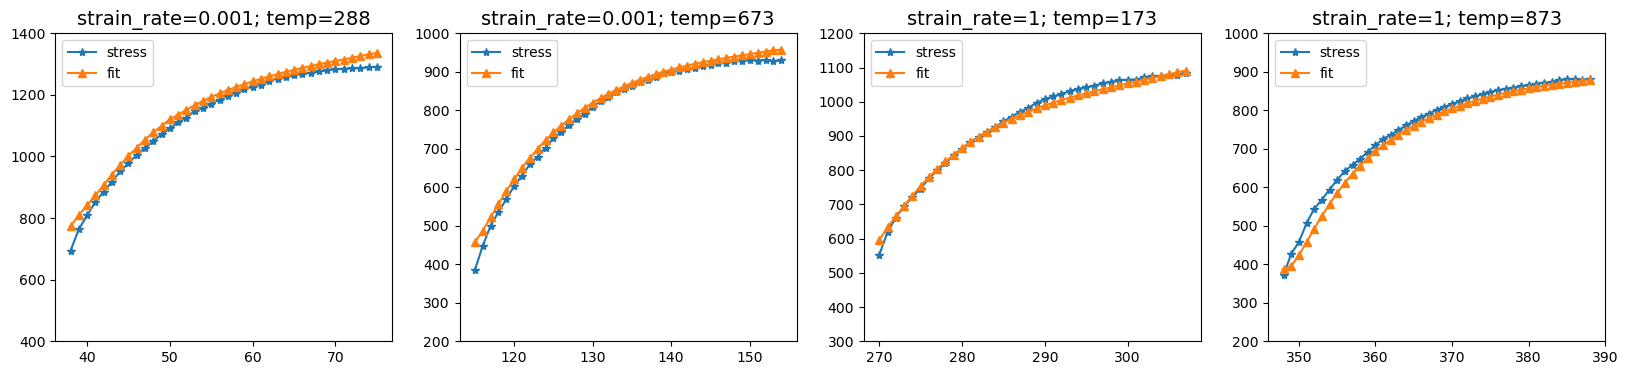

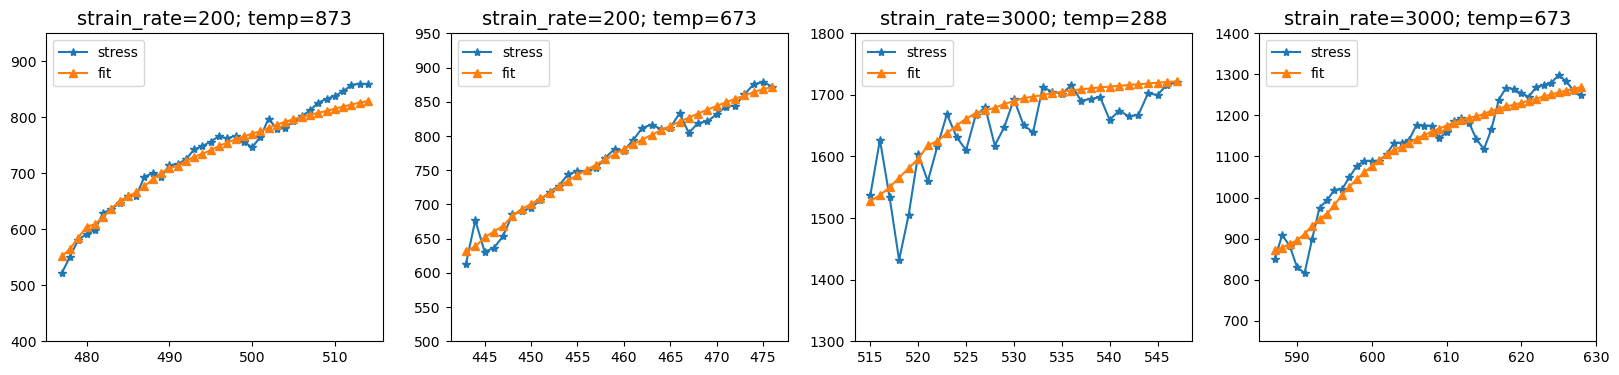

In [46]:
fig,ax = plt.subplots(ncols=4,nrows=1,dpi=100,figsize=(20,4))

#------------------------------------------------------
show1.plot(y = 'stress', marker="*", ax=ax[0])
show1.plot(y = 'fit', marker = "^", ax=ax[0])
ax[0].set_title('strain_rate=0.001; temp=288', fontsize = 14)
ax[0].set_ylim(400,1400)
#------------------------------------------------------
show2.plot(y = 'stress', marker="*", ax=ax[1])
show2.plot(y = 'fit', marker = "^", ax=ax[1])
ax[1].set_title('strain_rate=0.001; temp=673', fontsize = 14)
ax[1].set_ylim(200,1000)
#------------------------------------------------------
show3.plot(y = 'stress', marker="*", ax=ax[2])
show3.plot(y = 'fit', marker = "^", ax=ax[2])
ax[2].set_title('strain_rate=1; temp=173', fontsize = 14)
ax[2].set_ylim(300,1200)
#------------------------------------------------------
show4.plot(y = 'stress', marker="*", ax=ax[3])
show4.plot(y = 'fit', marker = "^", ax=ax[3])
ax[3].set_title('strain_rate=1; temp=873', fontsize = 14)
ax[3].set_ylim(200,1000)

fig,ax = plt.subplots(ncols=4,nrows=1,dpi=100,figsize=(20,4))

#------------------------------------------------------
show6.plot(y = 'stress', marker="*", ax=ax[0])
show6.plot(y = 'fit', marker = "^", ax=ax[0])
ax[0].set_title('strain_rate=200; temp=873', fontsize = 14)
ax[0].set_ylim(400,950)
#------------------------------------------------------
show7.plot(y = 'stress', marker="*", ax=ax[1])
show7.plot(y = 'fit', marker = "^", ax=ax[1])
ax[1].set_title('strain_rate=200; temp=673', fontsize = 14)
ax[1].set_ylim(500,950)
#------------------------------------------------------
show8.plot(y = 'stress', marker="*", ax=ax[2])
show8.plot(y = 'fit', marker = "^", ax=ax[2])
ax[2].set_title('strain_rate=3000; temp=288', fontsize = 14)
ax[2].set_ylim(1300,1800)
#------------------------------------------------------
show9.plot(y = 'stress', marker="*", ax=ax[3])
show9.plot(y = 'fit', marker = "^", ax=ax[3])
ax[3].set_title('strain_rate=3000; temp=673', fontsize = 14)
ax[3].set_ylim(650,1400)

## 7.2 Prediction Visualization

(400.0, 1100.0)

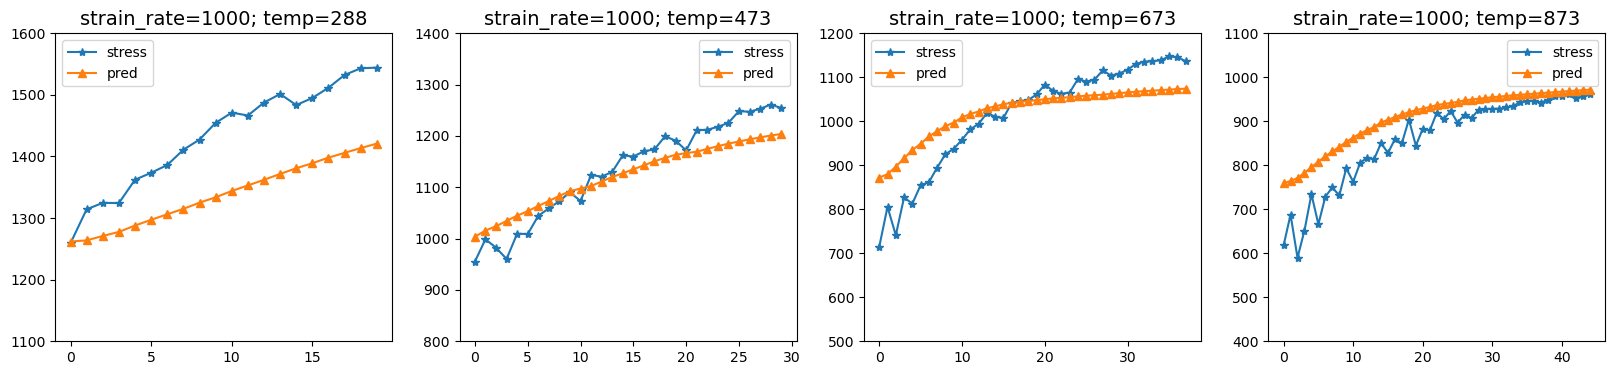

In [47]:
fig,ax = plt.subplots(ncols=4,nrows=1,dpi=100,figsize=(20,4))

#------------------------------------------------------
result_288.plot(y = 'stress', marker="*", ax=ax[0])
result_288.plot(y = 'pred', marker = "^", ax=ax[0])
ax[0].set_title('strain_rate=1000; temp=288', fontsize = 14)
ax[0].set_ylim(1100,1600)
#------------------------------------------------------
result_473.plot(y = 'stress', marker="*", ax=ax[1])
result_473.plot(y = 'pred', marker = "^", ax=ax[1])
ax[1].set_title('strain_rate=1000; temp=473', fontsize = 14)
ax[1].set_ylim(800,1400)
#------------------------------------------------------
result_673.plot(y = 'stress', marker="*", ax=ax[2])
result_673.plot(y = 'pred', marker = "^", ax=ax[2])
ax[2].set_title('strain_rate=1000; temp=673', fontsize = 14)
ax[2].set_ylim(500,1200)
#------------------------------------------------------
result_873.plot(y = 'stress', marker="*", ax=ax[3])
result_873.plot(y = 'pred', marker = "^", ax=ax[3])
ax[3].set_title('strain_rate=1000; temp=873', fontsize = 14)
ax[3].set_ylim(400,1100)


## 8. Explanation

In [23]:
import shap

In [31]:
extrain_loader = DataLoader(train_dataset, batch_size = 677, shuffle = False)

In [32]:
batch = next(iter(extrain_loader))
ex_train, _ = batch

In [34]:
model = Network(3)

In [35]:
explanation = shap.DeepExplainer(model, ex_train)
shap_values = explanation.shap_values(ex_train)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [36]:
shap_values

array([[ 0.02567283, -0.00904669,  0.0049674 ],
       [ 0.02355114, -0.00904967,  0.00498308],
       [ 0.02211488, -0.00905178,  0.00499352],
       ...,
       [-0.02940579,  0.02729798, -0.00415342],
       [-0.03063685,  0.02732942, -0.00413778],
       [-0.03163532,  0.02735477, -0.00412483]])

In [43]:
train.columns

Index(['plastic_strain', 'strain_rate', 'temperature', 'stress'], dtype='object')

In [44]:
explanation_result = pd.DataFrame(shap_values)
explanation_result.columns = ['plastic_strain', 'strain_rate', 'temperature']

In [45]:
explanation_result

,plastic_strain,strain_rate,temperature
0,0.025673,-0.009047,0.004967
1,0.023551,-0.009050,0.004983
2,0.022115,-0.009052,0.004994
3,0.020522,-0.009054,0.005005
4,0.018617,-0.009057,0.005018
...,...,...,...
672,-0.026936,0.027235,-0.004185
673,-0.028172,0.027267,-0.004169
674,-0.029406,0.027298,-0.004153
675,-0.030637,0.027329,-0.004138


In [49]:
ps = sum(abs(explanation_result['plastic_strain'])) / len(explanation_result)

In [50]:
sr = sum(abs(explanation_result['strain_rate'])) / len(explanation_result)

In [51]:
t = sum(abs(explanation_result['temperature'])) / len(explanation_result)

In [53]:
ps_importance = ps/(ps+sr+t)
sr_importance = sr/(ps+sr+t)
t_importance = t/(ps+sr+t)

In [54]:
print(ps_importance)
print(sr_importance)
print(t_importance)

0.509595134765614
0.4001591446979573
0.09024572053642885
